QB_Logo.svg



---
Fundamentals of Quantitative Biology

# **Statistics 04**
---


These notebooks are designed to be worked through step by step. We encourage you to go through all of it.  

# Table of Contents

This notebook contains the content of the 4th Statistics Lecture, which includes:

1. **Hypothesis Testing**
2. **Principal Component Analysis**
3. **Clustering Techniques**

# Hypothesis Testing: Power of a Test, Type I and Type II Errors

In this example, we are conducting a one-tailed hypothesis test to compare two scenarios. The null hypothesis ($H_0$​) represents the assumption that the true mean of the population is $\mu_0​=0$. This is the baseline assumption we test against. The alternative hypothesis ($H_1$​) represents the claim that the true mean of the population is greater than $\mu_0​=0$​, specifically $\mu_1=1.5$. The hypotheses are stated as:

- $H_0$​:  $~\mu_0​=0$ (The population mean is 0)
- $H_1$:  $~\mu_0​>0$ (The population mean is greater than 0)


The goal of the hypothesis test is to determine whether there is sufficient evidence to reject $H_0$​ in favor of $H_1$​. The critical value is chosen based on the significance level $\alpha$, which controls the probability of making a Type I error.

**Type I error: rejecting $H_0$​ when it is true.**

**Type II error occurs when we fail to reject the null hypothesis $H_0$ even though the alternative hypothesis $H_1$ is true.**

The probability of making a Type II error is denoted by $\beta$, and it depends on factors such as the sample size, the true difference between the means, and the significance level $\alpha$.


The complement of the Type II error probability is called the power of the test and quantifies the probability of correctly rejecting $H_0$​ when $H_1$​ is true.


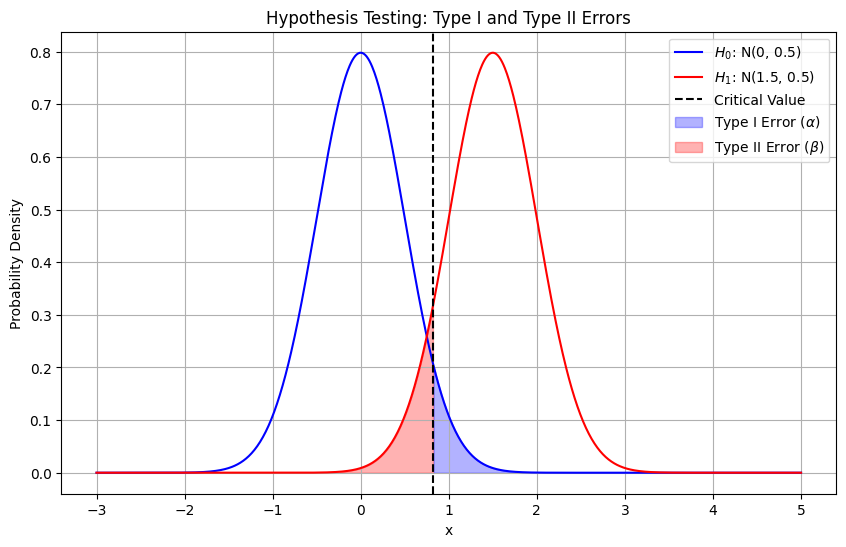

Critical Value: 0.82
Type I Error (alpha): 0.05
Type II Error (beta): 0.09
Power of the Test: 0.91


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the distributions
# You are welcome to play around with the values
# especially for the standard deviations which are only assumed values here

mu_0 = 0  # Mean under H0
sigma_0 = .5  # assumed standard deviation under H0
mu_1 = 1.5  # Mean under H1
sigma_1 = .5  # assumed standard deviation  under H1
alpha = 0.05  # Significance level (Type I error rate)


# Critical value for the test (one-tailed test)
critical_value = norm.ppf(1 - alpha, loc=mu_0, scale=sigma_0)

# Generate x values for plotting
x = np.linspace(-3, 5, 1000)

# Compute the PDF of the distributions
pdf_H0 = norm.pdf(x, loc=mu_0, scale=sigma_0)
pdf_H1 = norm.pdf(x, loc=mu_1, scale=sigma_1)

# Calculate Type II error (beta)
beta = norm.cdf(critical_value, loc=mu_1, scale=sigma_1)

# Calculate the power of the test
power = 1 - beta

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_H0, label='$H_0$: N(%s, %s)' %(mu_0,sigma_0), color='blue')
plt.plot(x, pdf_H1, label='$H_1$: N(%s, %s)' %(mu_1,sigma_1), color='red')
plt.axvline(critical_value, color='black', linestyle='--', label='Critical Value')
plt.fill_between(x, pdf_H0, 0, where=(x > critical_value), color='blue', alpha=0.3, label='Type I Error ($\\alpha$)')
plt.fill_between(x, pdf_H1, 0, where=(x <= critical_value), color='red', alpha=0.3, label='Type II Error ($\\beta$)')
plt.title('Hypothesis Testing: Type I and Type II Errors')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

# Print results
print(f"Critical Value: {critical_value:.2f}")
print(f"Type I Error (alpha): {alpha:.2f}")
print(f"Type II Error (beta): {beta:.2f}")
print(f"Power of the Test: {power:.2f}")

# Exercise: Hypothesis Testing with Mouse Weights

## Scenario
Researchers are studying the effects of a drug designed to **reduce weight gain** in mice on a high-fat diet. The baseline average weight of mice on a high-fat diet without the drug is known to be **30 grams**. The researchers want to test whether the average weight of mice treated with the drug is **significantly below the baseline**.

The hypotheses for this test are:

- **Null Hypothesis ($H_0$):** The true mean weight of the mice is $\mu_0 = 30$ grams (the drug has no effect on weight gain).
- **Alternative Hypothesis ($H_1$):** The true mean weight of the mice is $\mu_1 < 30$ grams (the drug reduces weight gain).

The researchers assume that the standard deviation of mouse weights is **5 grams**. The significance level for the test is set at $\alpha = 0.05$.

## Dataset
The researchers collected the following weights (in grams) from a sample of 20 mice treated with the drug:


In [ ]:
data = [28, 27, 29, 30, 26, 28, 27, 29, 25, 28,
27, 26, 28, 29, 27, 26, 28, 27, 29, 26]



Sample Mean: 27.50



## Tasks
1. **State the Hypotheses**:
   - Write down the null hypothesis ($H_0$) and the alternative hypothesis ($H_1$).

2. **Calculate the Sample Mean**:
   - Compute the mean of the sample data.

3. **Determine the Test Statistic**:
   - Use the formula for the $z$-test statistic:

     $
     z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}
     $
     where:
     - $\bar{x}$ is the sample mean,
     - $\mu_0$ is the mean under $H_0$,
     - $\sigma$ is the population standard deviation,
     - $n$ is the sample size.

4. **Find the Critical Value**:
   - Use the significance level $\alpha = 0.05$ to find the critical value for a **one-tailed test** (left-tailed) according to this equation (see lecture).
$$
\int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \, dx = \alpha
$$
  Hint: You don't need to solve this integral by hand. There is a very easy way to do it with Python's `scipy.stats` module.


5. **Make a Decision**:
   - Compare the test statistic to the critical value. Decide whether to reject or fail to reject $H_0$.


6. **Calculate the Power of the Test**:
   - Use the Python code to calculate the power of the test against an alternative hypothesis with $\mu_1 = 27 g$ and interpret its meaning.


In [ ]:
#####################
#
#  S O L U T I O N
#
#

# 1. State the Hypotheses
# - $H_0$: $\mu = 30$ (The average weight of the mice is 30 grams).
# - $H_1$: $\mu < 30$ (The average weight of the mice is less than 30 grams).

# 2. Sample mean
mu_0 = 30  # Null hypothesis mean
sigma = 5  # Population standard deviation
n = len(data)  # Sample size
z = (sample_mean - mu_0) / (sigma / np.sqrt(n))
print(f"Test Statistic (z): {z:.2f}")


# z-test and critical value for a left tailed test
alpha = 0.05
critical_value = mu_0 + norm.ppf(alpha) * (sigma / np.sqrt(n))
print(f"Critical Value: {critical_value:.2f}")

# Decide to reject H_0 as z < critical value


# Power of the test

mu_1 = 27  # Alternative hypothesis mean

# Calculate the z-score under the alternative hypothesis
z_alt = (critical_value -  mu_1) / (sigma / np.sqrt(n))

# Calculate the Type II error (beta)
beta = norm.cdf(z_alt)

# Calculate the power of the test
power = 1 - beta

# Print results
print(f"Type II Error (beta): {beta:.4f}")
print(f"Power of the Test: {power:.4f}")



Test Statistic (z): -2.24
Critical Value: 28.16
Type II Error (beta): 0.8505
Power of the Test: 0.1495


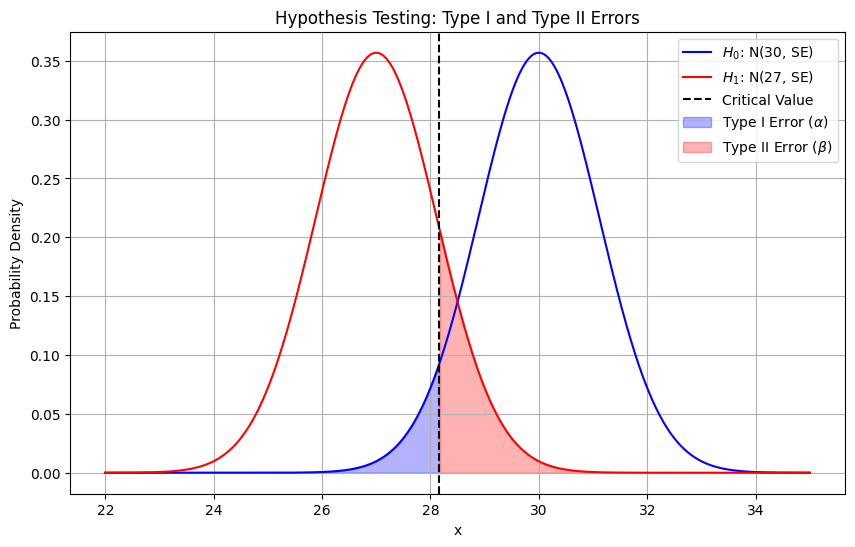

Critical Value: 28.16
Type I Error (alpha): 0.05
Type II Error (beta): 0.8505
Power of the Test: 0.1495


In [ ]:
# # # # # # # #
#
# Visualization
#

# Parameters for the distributions
mu_0 = 30  # Mean under H0
sigma = 5  # Population standard deviation
n = 20  # Sample size
mu_1 = 27  # Mean under H1
alpha = 0.05  # Significance level (Type I error rate)

# Standard error of the mean
se = sigma / np.sqrt(n)

# Critical value for the test (left-tailed test)
critical_value = mu_0 + norm.ppf(alpha) * se

# Generate x values for plotting
x = np.linspace(22, 35, 1000)

# Compute the PDF of the distributions
pdf_H0 = norm.pdf(x, loc=mu_0, scale=se)
pdf_H1 = norm.pdf(x, loc=mu_1, scale=se)

# Calculate Type II error (beta)
z_alt = (critical_value - mu_1) / se
beta = norm.cdf(z_alt)

# Calculate the power of the test
power = 1 - beta

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_H0, label='$H_0$: N(30, SE)', color='blue')
plt.plot(x, pdf_H1, label='$H_1$: N(27, SE)', color='red')
plt.axvline(critical_value, color='black', linestyle='--', label='Critical Value')
plt.fill_between(x, pdf_H0, 0, where=(x <= critical_value), color='blue', alpha=0.3, label='Type I Error ($\\alpha$)')
plt.fill_between(x, pdf_H1, 0, where=(x > critical_value), color='red', alpha=0.3, label='Type II Error ($\\beta$)')
plt.title('Hypothesis Testing: Type I and Type II Errors')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

# Print results
print(f"Critical Value: {critical_value:.2f}")
print(f"Type I Error (alpha): {alpha:.2f}")
print(f"Type II Error (beta): {beta:.4f}")
print(f"Power of the Test: {power:.4f}")

Critical Value: 1.64


# Principal Component Analysis (PCA)

In this section, we will explore the implementation of Principal Component Analysis (PCA) to analyze high-dimensional data.

To get started, the next cell allows you to download a sample real-world dataset. This dataset contains gene expression data, where different genes are expressed at varying levels across multiple cells. The values represent log-transformed counts of RNA reads.

### Dataset Description:
- **Source**: Filtered and subsetted scRNA-seq dataset based on 3k Peripheral Blood Mononuclear Cells (PBMCs) from a healthy donor. This dataset is part of the Single Cell Gene Expression Dataset by Cell Ranger 1.1.0, released on May 26, 2016, by 10x Genomics.
- **Structure**: Each row corresponds to a single cell, and each column represents the expression level of a specific gene.
- **Dimensions**: The dataset includes 1,857 genes and 2,009 cells.

This dataset will serve as the foundation for applying PCA and understanding its utility in reducing dimensionality while preserving key patterns in the data.

In [2]:
##### added for correction ####
from google.colab import drive
from google.colab import files
import pandas as pd
import pandas as pd
import numpy as np

drive.mount('/content/drive')

path = '/content/drive/Shared drives/MencheLab/teaching/MPL_QuantitativeBiology/data/STATS/STATS_04/'
counts = pd.read_csv(path + 'adata_lognormed_final.csv', index_col=0)
###############################

Mounted at /content/drive


The dataset is provided as a Pandas DataFrame, offering several convenient features.

We use the `head()` method to get a first glance at the data structure:

In [3]:
print(type(counts))
print(counts.head())

<class 'pandas.core.frame.DataFrame'>
                  TNFRSF4  CPSF3L  ATAD3C  C1orf86      RER1  TNFRSF25  \
AAACATACAACCAC-1      0.0     0.0     0.0      0.0  0.000000  4.552789   
AAACATTGAGCTAC-1      0.0     0.0     0.0      0.0  3.038826  0.000000   
AAACATTGATCAGC-1      0.0     0.0     0.0      0.0  3.545876  0.000000   
AAACCGTGCTTCCG-1      0.0     0.0     0.0      0.0  3.277530  0.000000   
AAACGCACTGGTAC-1      0.0     0.0     0.0      0.0  0.000000  0.000000   

                  TNFRSF9  CTNNBIP1  SRM  UBIAD1  ...     BRWD1  BACE2  SIK1  \
AAACATACAACCAC-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   
AAACATTGAGCTAC-1      0.0       0.0  0.0     0.0  ...  3.038826    0.0   0.0   
AAACATTGATCAGC-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   
AAACCGTGCTTCCG-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   
AAACGCACTGGTAC-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   

                  C21orf33  ICOSLG  

The `shape()` methods displays the dimension of your data set:

In [4]:
print('Rows (cells): %d, Columns (genes): %d' % counts.shape)

Rows (cells): 2009, Columns (genes): 1857


Extracting gene names or cell identifiers:

In [5]:
# Get the list of genes (column names)
genes = counts.columns.tolist()

# Print the first 5 genes
print("First 5 genes:", genes[:5])

# Get the list of cells (row labels/index)
cells = counts.index.tolist()

# Print the first 5 cells
print("First 5 cells:", cells[:5])

First 5 genes: ['TNFRSF4', 'CPSF3L', 'ATAD3C', 'C1orf86', 'RER1']
First 5 cells: ['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1', 'AAACCGTGCTTCCG-1', 'AAACGCACTGGTAC-1']


How can we visualize a dataset with 1,857 dimensions on a 2D screen? The naïve approach is to select one column as the x-axis and another column as the y-axis for plotting.

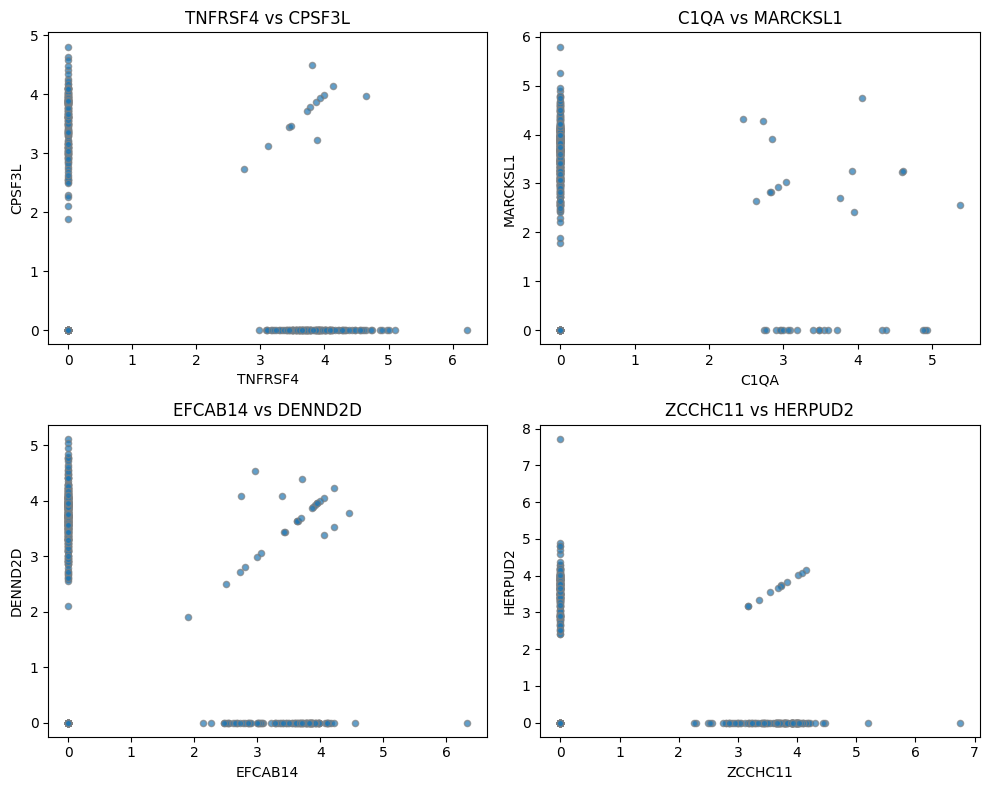

In [7]:
import matplotlib.pyplot as plt

# Define the feature pairs for each subplot
# You are welcome to try out other columns
feature_pairs = [
    (counts.columns[0], counts.columns[1]),  # First feature vs second feature
    (counts.columns[20], counts.columns[43]),  # Third feature vs fourth feature
    (counts.columns[64], counts.columns[95]),  # Fifth feature vs sixth feature
    (counts.columns[67], counts.columns[701])   # Seventh feature vs eighth feature
]

# Create a 2x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot each feature pair in a separate subplot
for ax, (feature_x, feature_y) in zip(axs.flat, feature_pairs):
    ax.scatter(counts[feature_x], counts[feature_y], alpha=0.7, edgecolor="gray", s=20)
    ax.set_xlabel(f"{feature_x}", fontsize=10)
    ax.set_ylabel(f"{feature_y}", fontsize=10)
    ax.set_title(f"{feature_x} vs {feature_y}", fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

However, this is apparently not very helpful...

We need to find a clever way to combine the different dimensions to form meaningful axis.


PCA captures the most variance in the original features of the dataset. Variance here refers to how much the data points differ from the mean, representing the spread or variability in the data. By focusing on the directions (principal components) with the highest variance, PCA ensures that the most important patterns and differences in the data are retained.

The following cell contains a step-by-step PCA implementation. Please refer to the lecture notes and make sure you understand the computational steps.

In [8]:
import numpy as np

def PCA_fromscratch(X, n_comp):

  # standardizing (rescaling) the data so that mean expression of each gene across cells = 0
  X_scaled = X - np.mean(X, axis = 0)
  # computing covariance matrix x_cov
  X_cov = np.cov(X_scaled , rowvar = False)

  # obtain eigenvalues and eigenvectors of the covariance matrix
  eigen_values, eigen_vectors = np.linalg.eigh(X_cov)

  # sort eigenvalues in decreasing order (largest first)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  # sort eigenvectors by decreasing eigenvalues as well
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  # construct the projection matrix W from the first n_comp eigenvectors
  proj_matrix = sorted_eigenvectors[:,0:n_comp].transpose()

  # get reduced data by multiplying X_scaled with the projection matrix W
  X_reduced = np.dot(proj_matrix,X_scaled.transpose()).transpose()
  return X_reduced

Now, we can utilize the first principal components as x- and y-axis to plot all cells in a 2D figure:

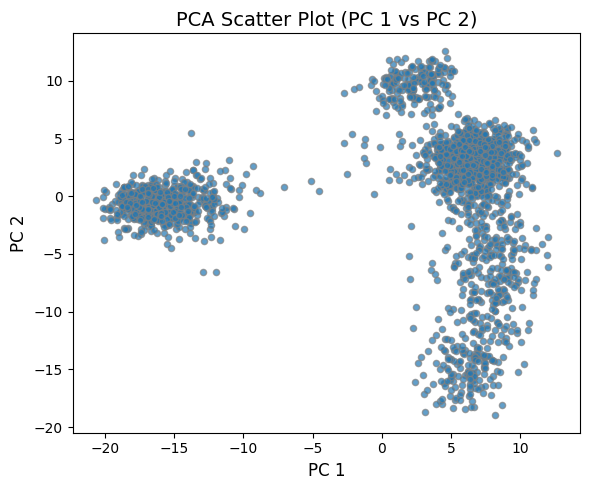

In [9]:
import matplotlib.pyplot as plt

# Perform PCA with 50 components
counts_reduced = PCA_fromscratch(counts, 50)

# Define the PCA components to visualize
comp_x, comp_y = 0, 1  # Define the PCA components to plot (e.g., PC1 vs PC2)

# Create a single scatter plot without color
plt.figure(figsize=(6, 5))
plt.scatter(counts_reduced[:, comp_x], counts_reduced[:, comp_y], alpha=0.7, edgecolor="gray", s=20)
plt.xlabel(f"PC {comp_x+1}", fontsize=12)
plt.ylabel(f"PC {comp_y+1}", fontsize=12)
plt.title(f"PCA Scatter Plot (PC {comp_x+1} vs PC {comp_y+1})", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Let us enhance this plot by assigning a color code to represent individual gene expression levels.

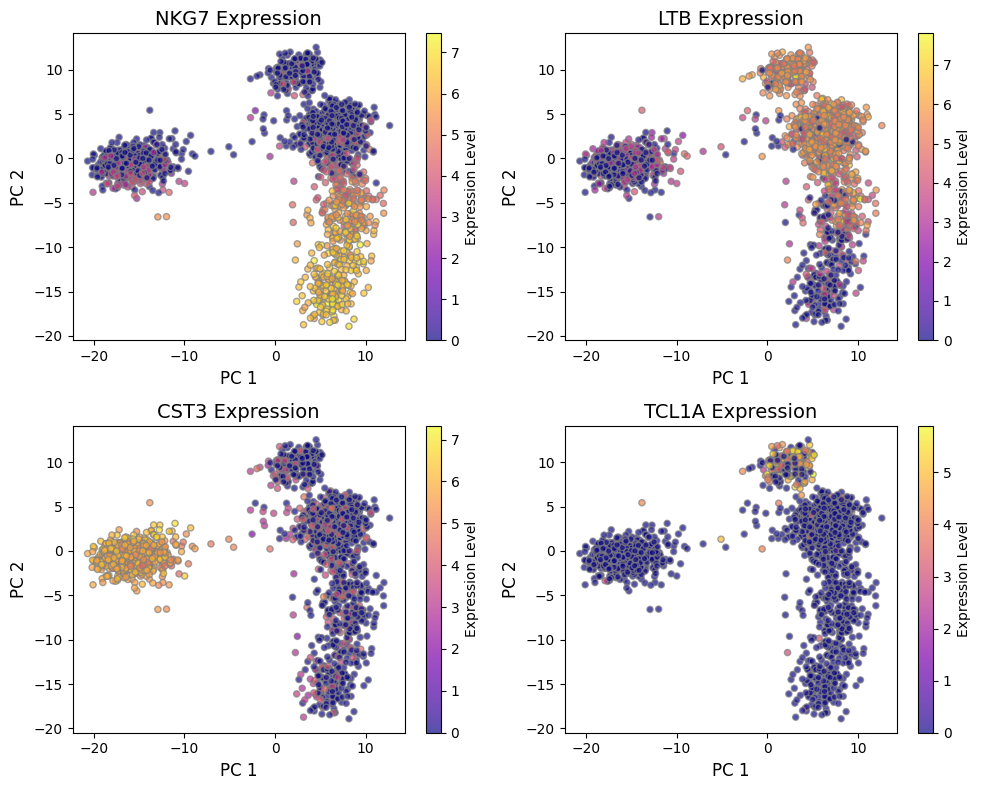

In [10]:
import matplotlib.pyplot as plt


# Perform PCA with 50 components
counts_reduced = PCA_fromscratch(counts, 50)

# Create figure and axes with better spacing
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Define four unique gene markers and PCA components for visualization
list_genes = ["NKG7", "LTB", "CST3", "TCL1A"]  # Replace with your desired gene names
components = [(0, 1), (0, 1), (0, 1), (0, 1)]  # Define PCA components for each subplot

# Scatter plot configurations
for ax, (comp_x, comp_y), gene in zip(axs.flat, components, list_genes):
    scatter = ax.scatter(counts_reduced[:, comp_x], counts_reduced[:, comp_y],
                         c=counts.loc[:, gene], cmap="plasma", alpha=0.7, edgecolor="gray", s=20)
    ax.set_xlabel(f"PC {comp_x+1}", fontsize=12)
    ax.set_ylabel(f"PC {comp_y+1}", fontsize=12)
    ax.set_title(f"{gene} Expression", fontsize=14)
    fig.colorbar(scatter, ax=ax, label="Expression Level")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

Often, when using PCA, it is good practice to display the amount of variance explained. We can achieve this by making a slight modification to the function above:

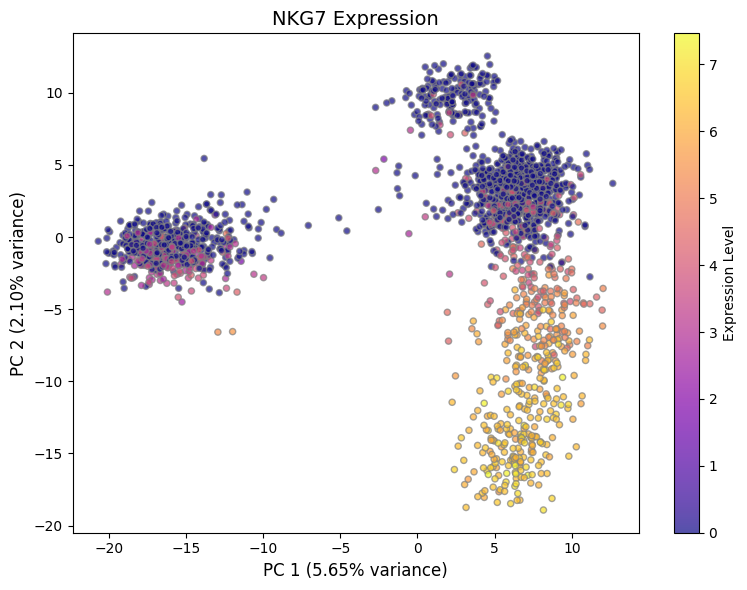

In [11]:

def PCA_explainedVariance(X, n_comp):
  # standardizing (rescaling) the data so that mean expression of each gene across cells = 0
  X_scaled = X - np.mean(X, axis = 0)
  # computing covariance matrix x_cov
  X_cov = np.cov(X_scaled , rowvar = False)

  # obtain eigenvalues and eigenvectors of the covariance matrix
  eigen_values, eigen_vectors = np.linalg.eigh(X_cov)

  # sort eigenvalues in decreasing order (largest first)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalues = eigen_values[sorted_index]
  # sort eigenvectors by decreasing eigenvalues as well
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  # compute explained variance fraction
  expl_variance = [100*(ev / np.sum(eigen_values)) for ev in sorted_eigenvalues]

  # construct the projection matrix W from the first n_comp eigenvectors
  proj_matrix = sorted_eigenvectors[:,0:n_comp].transpose()

  # get reduced data by multiplying X_scaled with the projection matrix W
  X_reduced = np.dot(proj_matrix,X_scaled.transpose()).transpose()
  return X_reduced, expl_variance[0:n_comp]


counts_reduced, expl_var = PCA_explainedVariance(counts, 50)


# Create a single figure
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

# Scatter plot for the first gene
scatter = ax.scatter(counts_reduced[:, comp_x], counts_reduced[:, comp_y],
                     c=counts.loc[:, list_genes[0]], cmap="plasma", alpha=0.7, edgecolor="gray", s=20)

# Add axis labels with explained variance
ax.set_xlabel(f"PC {comp_x+1} ({expl_var[comp_x]:.2f}% variance)", fontsize=12)
ax.set_ylabel(f"PC {comp_y+1} ({expl_var[comp_y]:.2f}% variance)", fontsize=12)

# Add a title for the gene
ax.set_title(f"{list_genes[0]} Expression", fontsize=14)

# Add a colorbar
fig.colorbar(scatter, ax=ax, label="Expression Level")

# Show the plot
plt.tight_layout()
plt.show()



## Exercise: PCA Analysis Using Library-Based Methods

Instead of manually computing the covariance matrix and eigenvalues, use numpy's built-in Singular Value Decomposition (SVD) to perform PCA. SVD is a more numerically stable and efficient way to compute principal components.

**Note:**  
Before starting Task 1, make sure to consult the official documentation for the corresponding libraries (e.g., [NumPy SVD documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) or [scikit-learn PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to understand how to implement the required methods. Alternatively, you may use an AI assistant to help guide you, but ensure that you do not blindly copy and paste the code. Instead, ask the assistant to explain the logic and functionality of the code so you fully understand what is happening at each step. This will help you learn and apply the concepts effectively.


Task 1:

Use `numpy.linalg.svd` to decompose the data matrix.
Project the data onto the top n_comp principal components.


Task 2:

The `scikit-learn` library provides a highly optimized and user-friendly implementation of PCA. Use the PCA class from sklearn.decomposition to perform PCA on the dataset.

Fit the PCA model to the data.
Transform the data to the reduced dimensionality.

Task 3:

Compare Results:

Compare the results of the three methods (PCA_fromscratch, numpy, and scikit-learn) by plotting the first two principal components in a scatter plot.
Ensure that the results are consistent across all methods.




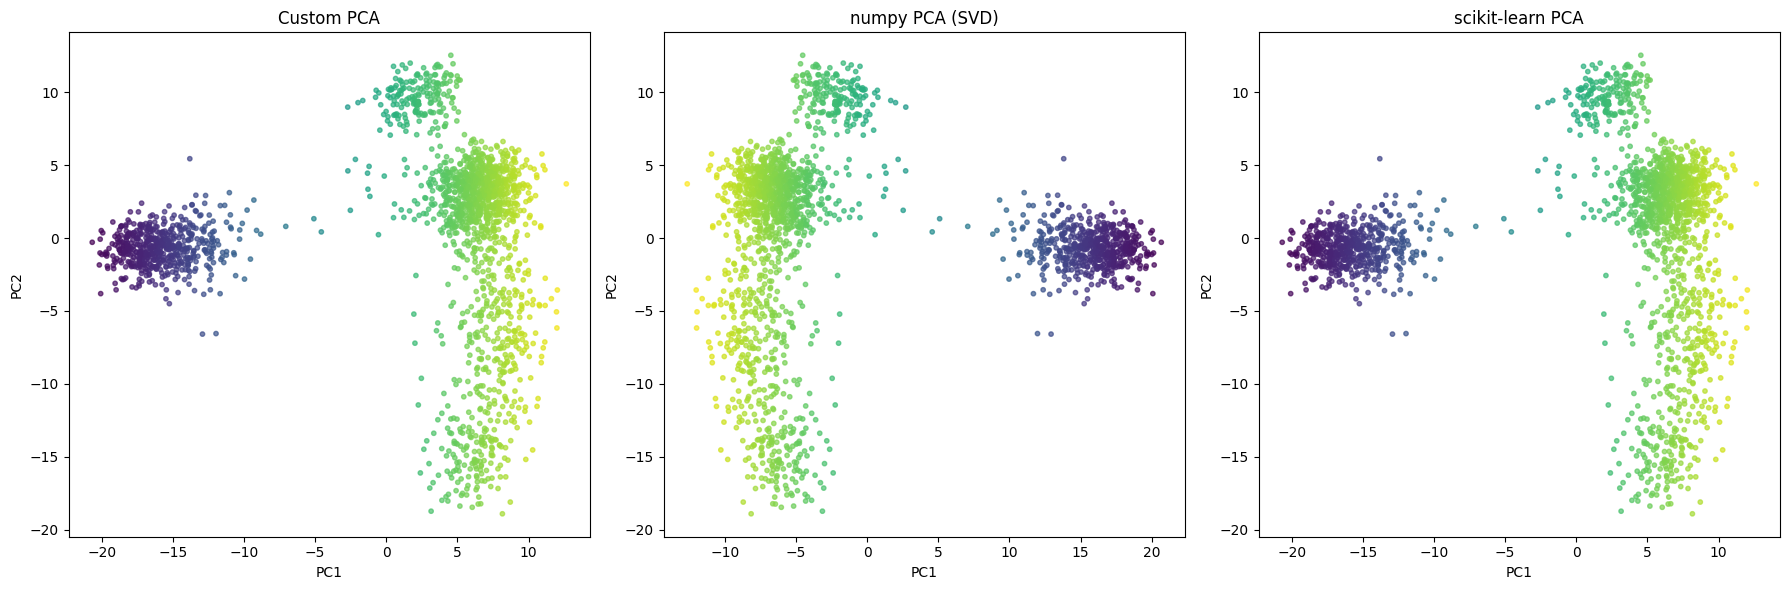

In [ ]:
##############################
#
#  S O L U T I O N
#
#
##############################
##############################



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset (replace with your actual dataset)
# Assume `filtered_expression_df` is already loaded and contains the log-transformed counts
data = counts_reduced  # Convert DataFrame to numpy array


# Perform PCA using the custom implementation
custom_pca_result = PCA_fromscratch(data, n_comp=2)

# ------------------------------
# Step 2: PCA Using numpy (SVD)
# ------------------------------
# Standardizing the data
data_scaled = data - np.mean(data, axis=0)

# Perform SVD
U, S, Vt = np.linalg.svd(data_scaled, full_matrices=False)
numpy_pca_result = np.dot(U[:, :2], np.diag(S[:2]))  # Project onto top 2 components

# ------------------------------
# Step 3: PCA Using scikit-learn
# ------------------------------
# Perform PCA using scikit-learn
pca = PCA(n_components=2)
sklearn_pca_result = pca.fit_transform(data)

# ------------------------------
# Step 4: Compare Results
# ------------------------------
# Scatter plot of the first two principal components for each method
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Custom PCA
axs[0].scatter(custom_pca_result[:, 0], custom_pca_result[:, 1], c=data[:, 0], cmap="viridis", s=10, alpha=0.7)
axs[0].set_title("Custom PCA")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")

# numpy PCA
axs[1].scatter(numpy_pca_result[:, 0], numpy_pca_result[:, 1], c=data[:, 0], cmap="viridis", s=10, alpha=0.7)
axs[1].set_title("numpy PCA (SVD)")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")

# scikit-learn PCA
axs[2].scatter(sklearn_pca_result[:, 0], sklearn_pca_result[:, 1], c=data[:, 0], cmap="viridis", s=10, alpha=0.7)
axs[2].set_title("scikit-learn PCA")
axs[2].set_xlabel("PC1")
axs[2].set_ylabel("PC2")

plt.tight_layout()
plt.show()



# Clustering: Implementing k-means


## K-means Clustering: Step-by-Step Explanation

K-means clustering is an unsupervised machine learning algorithm used to group data points into clusters based on their similarity. The algorithm works iteratively to minimize the distance between data points and their assigned cluster centers. Below, we will walk through the steps of K-means clustering and implement them in Python.

### Steps of K-means Clustering:
1. **Initialization**:
   - Choose the number of clusters, $k$.
   - Randomly initialize $k$ cluster centers (or optionally provide initial centers).

2. **Assignment**:
   - For each data point, calculate the distance to each cluster center.
   - Assign the data point to the cluster with the nearest center.

3. **Update**:
   - Recalculate the cluster centers as the mean of all points assigned to each cluster.

4. **Repeat**:
   - Repeat the assignment and update steps until the cluster centers no longer change (convergence) or a maximum number of iterations is reached.


### Visualization:
- At each step, we will visualize the data points, cluster assignments, and cluster centers to better understand how the algorithm works.

We will start with an artificial and very small set of points.  By the end of this section, we will consider the previously discussed gene expression data and it will be your turn to apply the learned method to this real world data set.

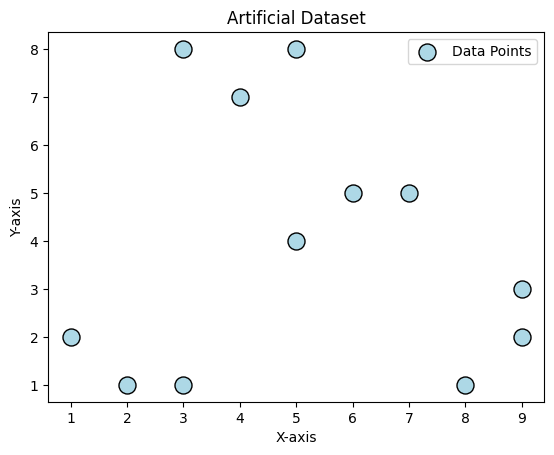

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a simple dataset with 12 points
data = np.array([
    [1, 2], [2, 1], [3, 1], [5, 4], [6, 5], [7, 5],
    [3, 8], [4, 7], [5, 8], [8, 1], [9, 2], [9, 3]
])

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], color='lightblue', label='Data Points', s= 150, edgecolors='k')
plt.title("Artificial Dataset")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

In [ ]:
# Step 2: Define a function to calculate Euclidean distance
# Note, that using the Euclidean distance is only one option oput of many
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Example: Calculate the distance between two points
point_a = np.array([1, 2])
point_b = np.array([5, 4])
distance = euclidean_distance(point_a, point_b)
print(f"Distance between {point_a} and {point_b}: {distance:.2f}")

Distance between [1 2] and [5 4]: 4.47


Initial Cluster Centers:
[[2 1]
 [6 5]
 [3 8]
 [9 2]]


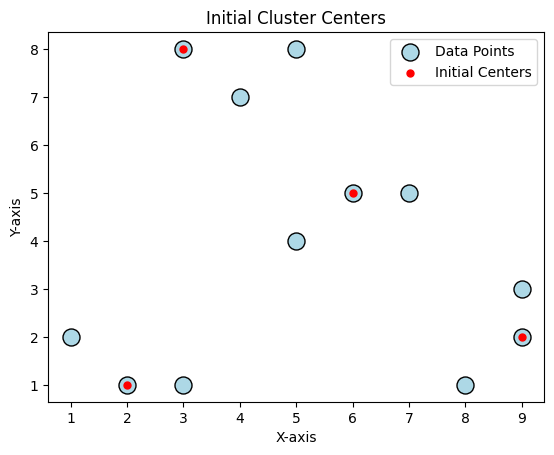

In [ ]:
# Step 3: Initialize two cluster centers
# np.random.seed(42)  # For reproducibility
k = 4  # Number of clusters
# centers = data[np.random.choice(data.shape[0], k, replace=False)]

# Manually set initial cluster centers
centers = np.array([
    [2, 1],  # Near the bottom-left cluster
    [6, 5],  # Near the middle cluster
    [3, 8],  # Near the top cluster
    [9, 2]   # Near the bottom-right cluster
])

print("Initial Cluster Centers:")
print(centers)

# Plot the data points and initial cluster centers
plt.scatter(data[:, 0], data[:, 1], color='lightblue', label='Data Points', s= 150, edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1], color='red', label='Initial Centers', marker='.', s=100)
plt.title("Initial Cluster Centers")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

Point [1 2] in assigned to cluster 1
Point [2 1] in assigned to cluster 1
Point [3 1] in assigned to cluster 1
Point [5 4] in assigned to cluster 2
Point [6 5] in assigned to cluster 2
Point [7 5] in assigned to cluster 2
Point [3 8] in assigned to cluster 3
Point [4 7] in assigned to cluster 3
Point [5 8] in assigned to cluster 3
Point [8 1] in assigned to cluster 4
Point [9 2] in assigned to cluster 4
Point [9 3] in assigned to cluster 4


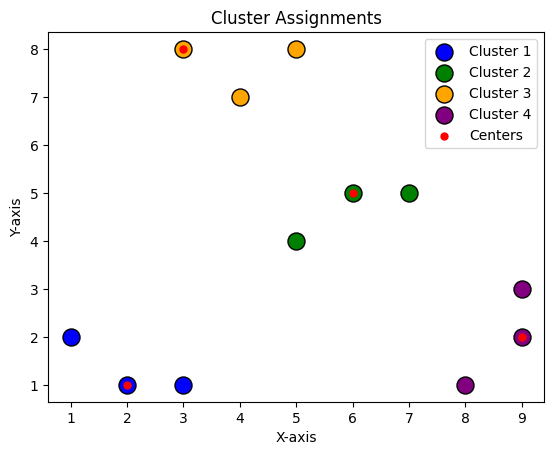

In [ ]:
# For each point, calculate the distance to the cluster centers and assign it to the nearest one.

# Step 4: Assign each point to the nearest cluster
def assign_clusters(data, centers):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, center) for center in centers]
        cluster = np.argmin(distances)  # Index of the nearest cluster
        clusters.append(cluster)
    return np.array(clusters)

# Assign points to clusters
clusters = assign_clusters(data, centers)

for i, pt in enumerate(data):
  # print(pt)
  print("Point %s in assigned to cluster %s" %(pt,clusters[i]+1))

# Plot the data points with cluster assignments
colors = ['blue', 'green','orange','purple']
for i in range(k):
    cluster_points = data[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}', s= 150, edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1], color='red', label='Centers', marker='.', s=100)
plt.title("Cluster Assignments")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

Updated Cluster Centers:
[[2.         1.33333333]
 [6.         4.66666667]
 [4.         7.66666667]
 [8.66666667 2.        ]]


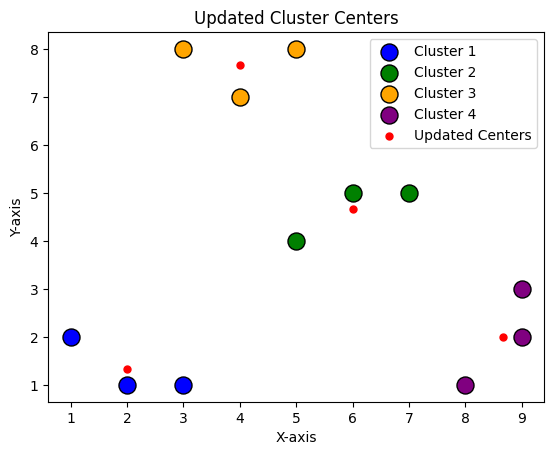

In [ ]:
# Recalculate the cluster centers as the mean of all points assigned to each cluster.

# Step 5: Update cluster centers
def update_centers(data, clusters, k):
    new_centers = []
    for i in range(k):
        cluster_points = data[clusters == i]
        new_center = np.mean(cluster_points, axis=0)
        new_centers.append(new_center)
    return np.array(new_centers)

# Update the cluster centers
new_centers = update_centers(data, clusters, k)
print("Updated Cluster Centers:")
print(new_centers)

# Plot the updated cluster centers
for i in range(k):
    cluster_points = data[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}', s= 150, edgecolors='k')
plt.scatter(new_centers[:, 0], new_centers[:, 1], color='red', label='Updated Centers', marker='.', s=100)
plt.title("Updated Cluster Centers")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

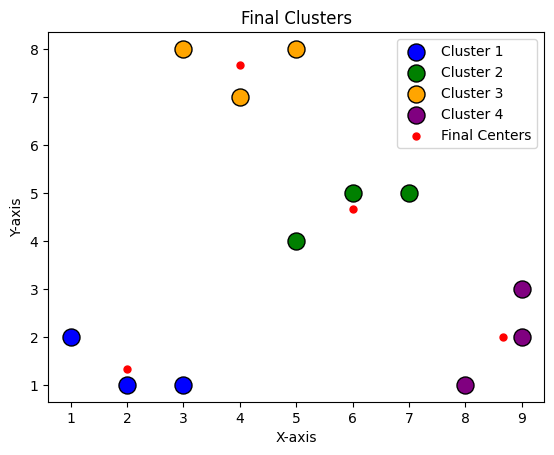

In [ ]:
# Step 6: Iterate until convergence
def k_means(data, k, centers=None, max_iters=10):
    # If no initial centers are provided, choose them randomly
    if centers is None:
        np.random.seed(42)  # For reproducibility
        centers = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        clusters = assign_clusters(data, centers)
        new_centers = update_centers(data, clusters, k)
        if np.all(centers == new_centers):  # Convergence check
            break
        centers = new_centers
    return clusters, centers

# Run K-means
final_clusters, final_centers = k_means(data, k, centers)

# Plot the final clusters
for i in range(k):
    cluster_points = data[final_clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}', s= 150, edgecolors='k')
plt.scatter(final_centers[:, 0], final_centers[:, 1], color='red', label='Final Centers', marker='.', s=100)
plt.title("Final Clusters")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

## Exercise: Clustering techniques

    (1) Apply K-means Clustering:
        Use the implemented k_means function to cluster the PCA-reduced dataset (counts_reduced).
        Assign each data point to a cluster and visualize the clusters by coloring the points according to their cluster assignments.
        Try out differnt values for the number of clusters k.

    (2) Use scikit-learn for K-means:
        Implement K-means clustering using the KMeans class from the scikit-learn module.
        Compare the results of the scikit-learn implementation with your custom implementation.

    (3) Explore Other Clustering Techniques:
        Research and implement at least one additional clustering technique (e.g., hierarchical clustering, DBSCAN, ...) using scikit-learn.
        Visualize and compare the results of the new clustering technique with K-means.

    (4) Interpret the Results:
        Reflect on the differences between the clustering techniques.
        Discuss how the choice of clustering method and parameters (e.g., number of clusters) affects the results.


In [ ]:
##############################
#
#  S O L U T I O N
#
#
##############################
##############################



# Number of clusters (e.g., 3 clusters)
k = 2

# Apply the k_means function to the PCA-reduced data
clusters, centers = k_means(counts_reduced, k)

# # Print the cluster assignments
# print("Cluster Assignments:", clusters)
# print("Cluster Centers:", centers)

/tmp/ipython-input-31-892094765.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', n)  # Use 'tab10', 'tab20', or other colormaps


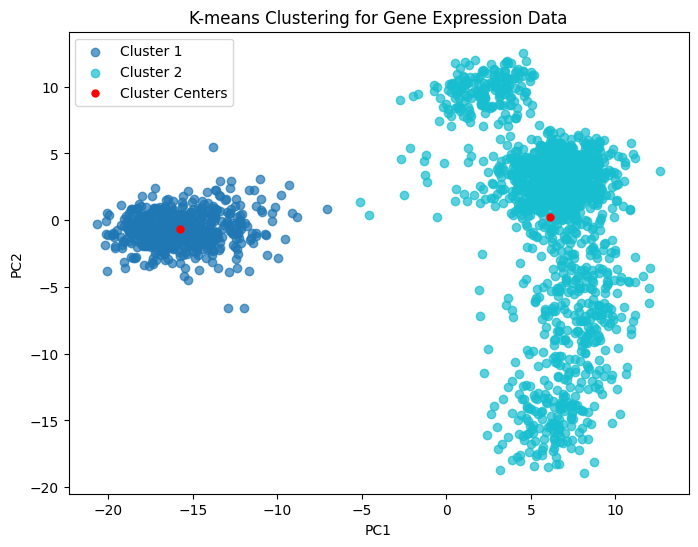

In [ ]:
# Plot the clusters in PCA space
plt.figure(figsize=(8, 6))
# colors = ['blue', 'green', 'orange']  # Define colors for clusters

def generate_colors(n):
    # Create a custom colormap (e.g., 'viridis' or 'coolwarm')
    cmap = plt.cm.get_cmap('tab10', n)  # Use 'tab10', 'tab20', or other colormaps
    colors = [cmap(i) for i in range(n)]
    return colors

# Example usage
colors = generate_colors(k)


for i in range(k):
    cluster_points = counts_reduced[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}', alpha=0.7)

# # Overlay the gene expression levels as a color gradient
# scatter = plt.scatter(counts_reduced[:, 0], counts_reduced[:, 1],
#                        c=counts.loc[:, list_genes[0]], cmap="plasma", alpha=0.7, edgecolor="gray", s=20)
# plt.colorbar(scatter, label=f"{list_genes[0]} Expression Level")

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], color='red', label='Cluster Centers', marker='.', s=100)

# Add labels and legend
plt.title(f"K-means Clustering for Gene Expression Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

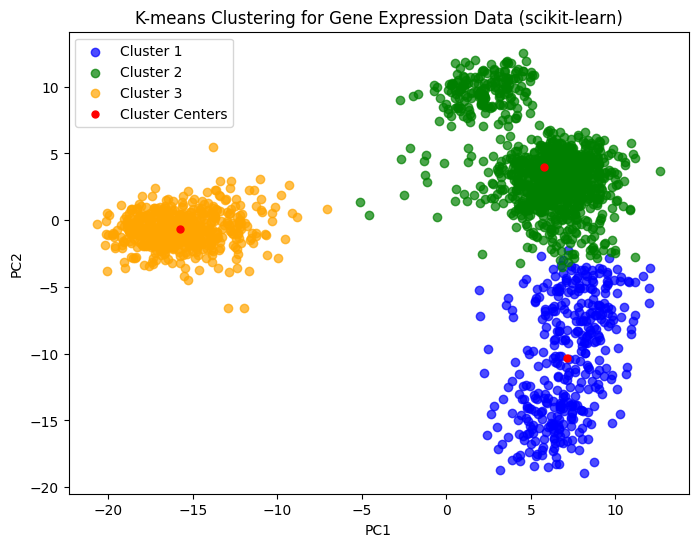

In [ ]:
from sklearn.cluster import KMeans

# Number of clusters
k = 3

# Perform K-means clustering using scikit-learn
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(counts_reduced)

# Get the cluster assignments and cluster centers
clusters = kmeans.labels_  # Cluster assignments for each point
centers = kmeans.cluster_centers_  # Coordinates of cluster centers

# Plot the clusters in PCA space
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'orange']  # Define colors for clusters
for i in range(k):
    cluster_points = counts_reduced[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}', alpha=0.7)


# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], color='red', label='Cluster Centers', marker='.', s=100)

# Add labels and legend
plt.title(f"K-means Clustering for Gene Expression Data (scikit-learn)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

### Hierarchical clustering

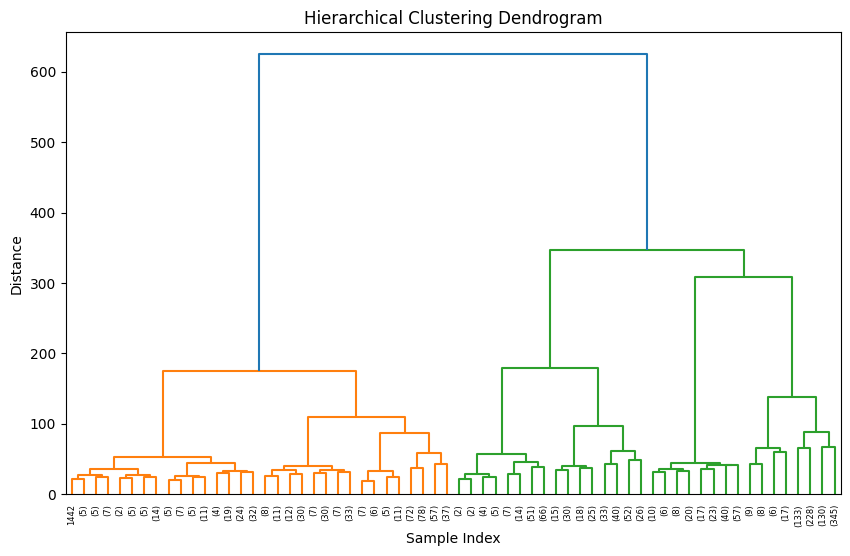

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = linkage(counts_reduced, method='ward')  # Use Ward's method for clustering

# Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)  # Truncate for better readability
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Define the number of clusters
k = 3  # Adjust this value as needed

# Extract cluster labels
cluster_labels = fcluster(linkage_matrix, t=k, criterion='maxclust')  # 'maxclust' ensures k clusters

# Print the cluster labels
print("Cluster labels:", cluster_labels)

Cluster labels: [3 3 3 ... 3 1 3]


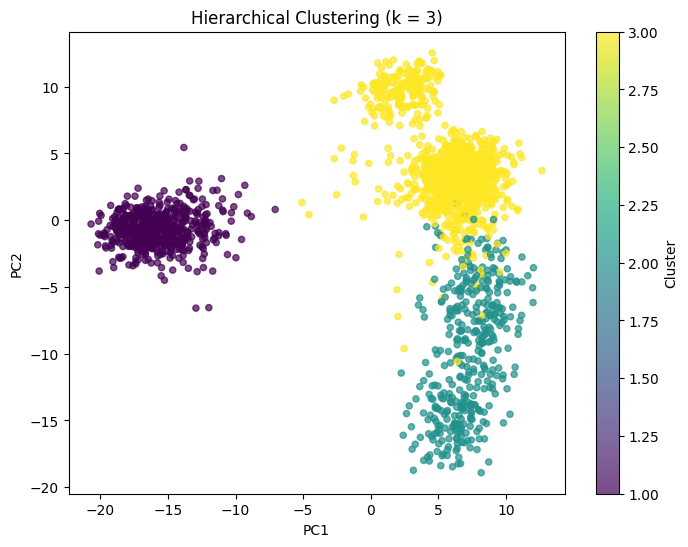

In [ ]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(counts_reduced[:, 0], counts_reduced[:, 1], c=cluster_labels, cmap='viridis', s=20, alpha=0.7)
plt.title("Hierarchical Clustering (k = 3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN


# Define DBSCAN parameters
eps = 15  # Maximum distance between two points to be considered neighbors
min_samples = 10  # Minimum number of points to form a cluster

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(counts_reduced)

# Print the cluster labels
print("Cluster labels:", cluster_labels)

Cluster labels: [-1 -1 -1 ... -1  0 -1]


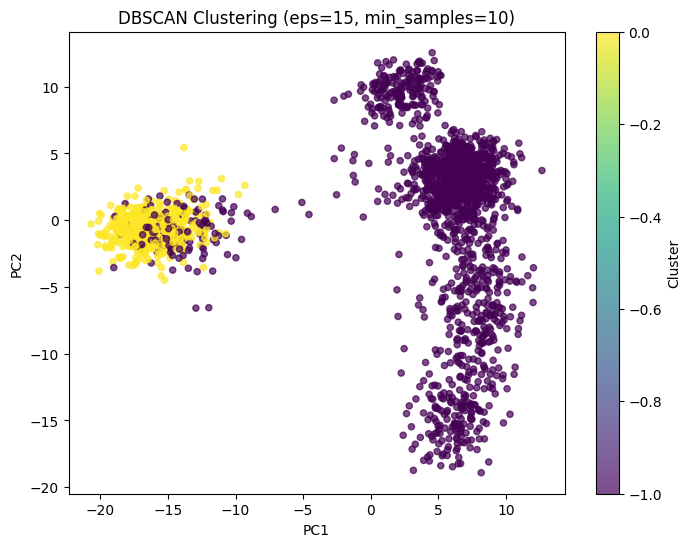

In [ ]:
# Scatter plot of DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(counts_reduced[:, 0], counts_reduced[:, 1], c=cluster_labels, cmap='viridis', s=20, alpha=0.7)
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()